**5. Seismic Bumps**
---


In [1]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [2]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify

In [3]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [4]:
from scipy.io import arff
# Reading the dataset and creating the dataframe
seismic = arff.loadarff('seismic-bumps.arff')

df = pd.DataFrame(seismic[0])

In [5]:
import sklearn
sklearn.__version__

'0.21.2'

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [5]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,b'0'
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,b'0'
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
seismic           2584 non-null object
seismoacoustic    2584 non-null object
shift             2584 non-null object
genergy           2584 non-null float64
gpuls             2584 non-null float64
gdenergy          2584 non-null float64
gdpuls            2584 non-null float64
ghazard           2584 non-null object
nbumps            2584 non-null float64
nbumps2           2584 non-null float64
nbumps3           2584 non-null float64
nbumps4           2584 non-null float64
nbumps5           2584 non-null float64
nbumps6           2584 non-null float64
nbumps7           2584 non-null float64
nbumps89          2584 non-null float64
energy            2584 non-null float64
maxenergy         2584 non-null float64
class             2584 non-null object
dtypes: float64(14), object(5)
memory usage: 383.6+ KB


In [10]:
set(df['seismic'])

{b'a', b'b'}

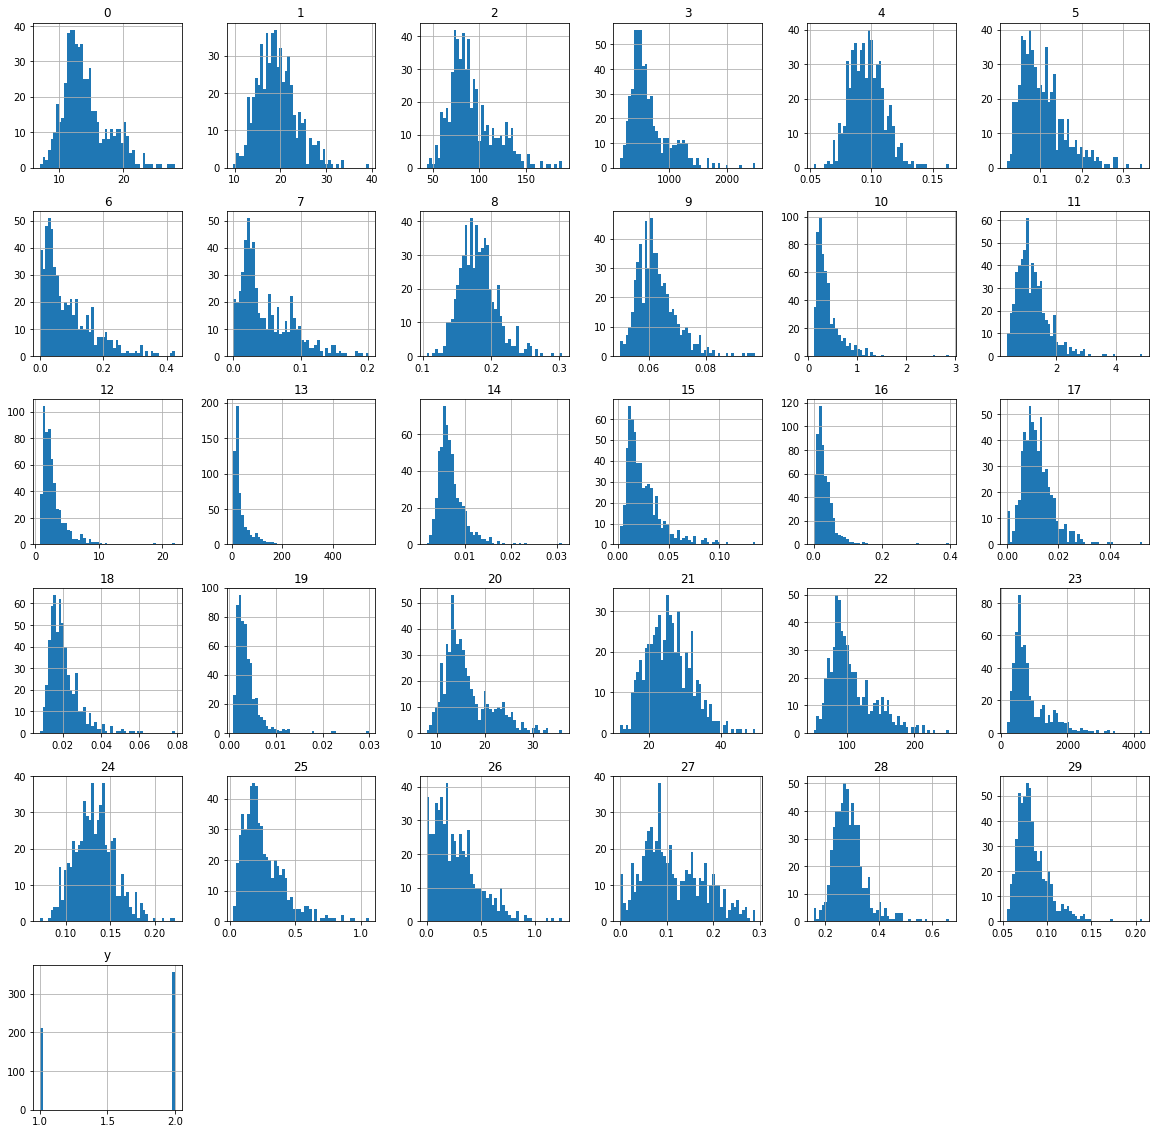

In [9]:
df.hist(bins= 50, figsize=(20,20))
plt.show()

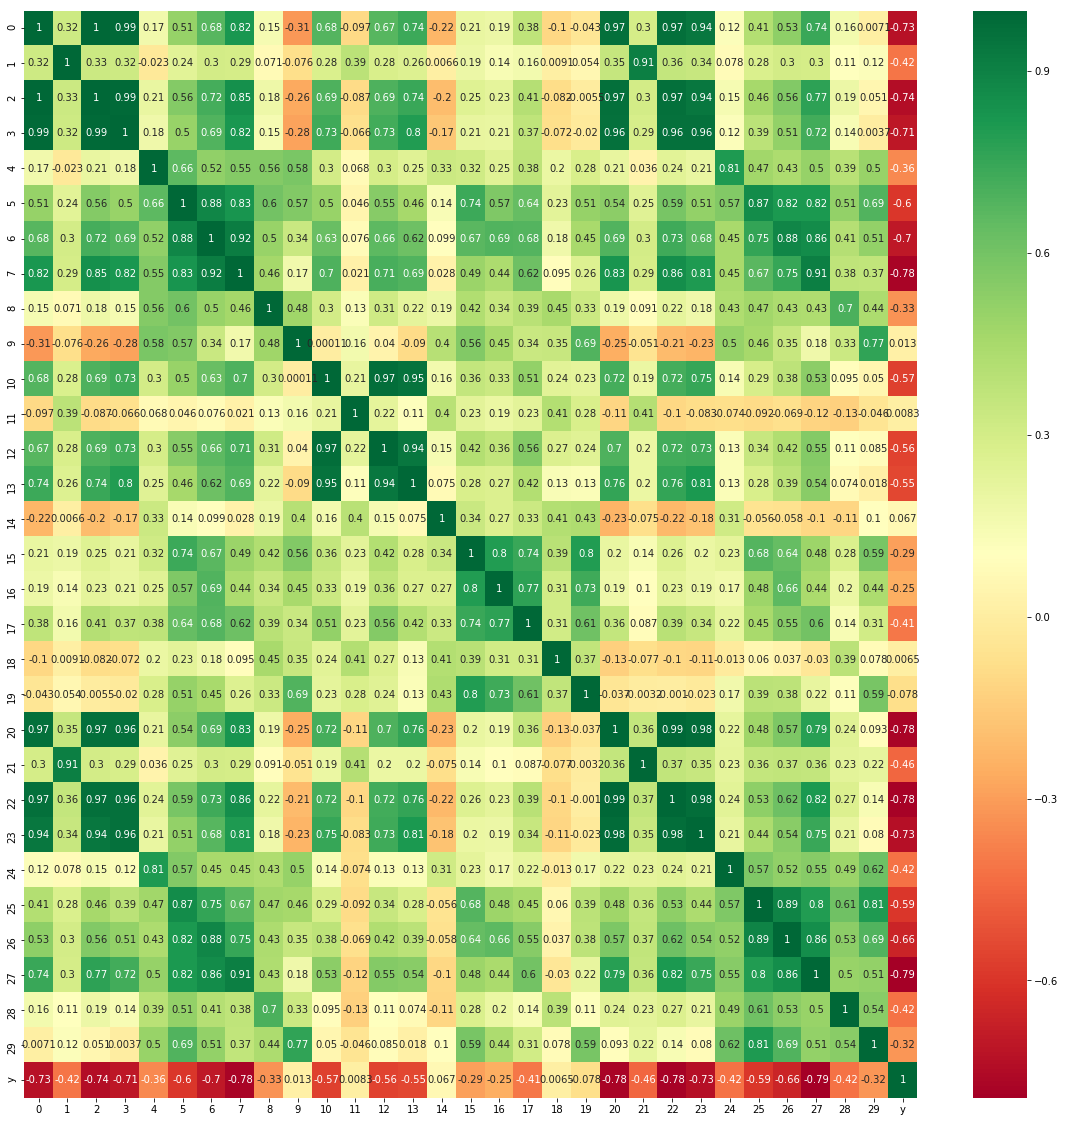

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [12]:
corrmat['y'].sort_values(ascending=True)

27   -0.793566
22   -0.782914
7    -0.776614
20   -0.776454
2    -0.742636
23   -0.733825
0    -0.730029
3    -0.708984
6    -0.696360
26   -0.659610
5    -0.596534
25   -0.590998
10   -0.567134
12   -0.556141
13   -0.548236
21   -0.456903
24   -0.421465
28   -0.416294
1    -0.415185
17   -0.408042
4    -0.358560
8    -0.330499
29   -0.323872
15   -0.292999
16   -0.253730
19   -0.077972
18    0.006522
11    0.008303
9     0.012838
14    0.067016
y     1.000000
Name: y, dtype: float64

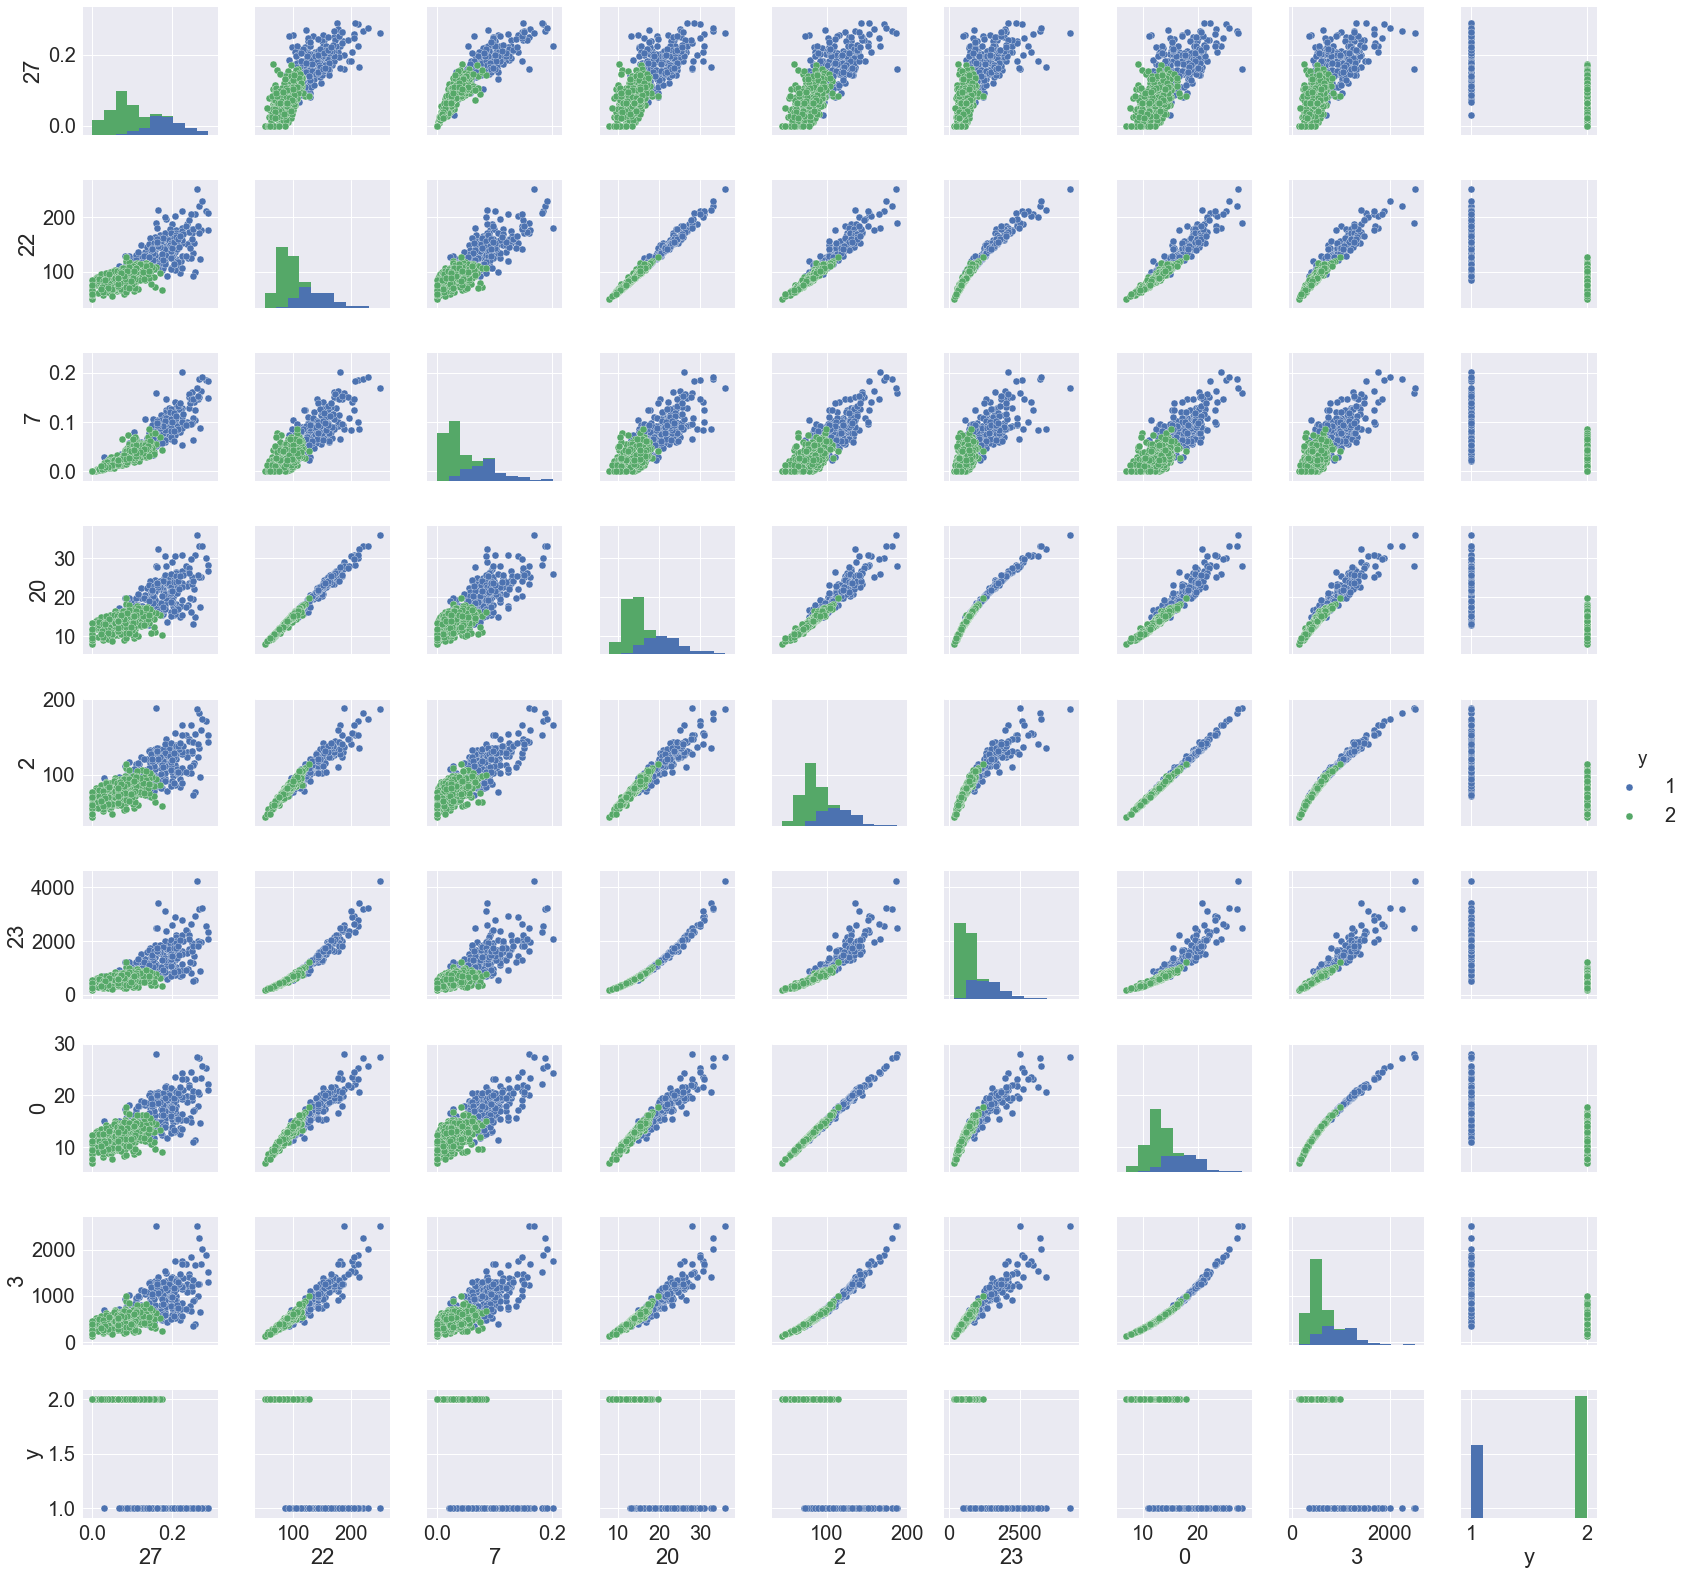

In [13]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df[[27,22, 7,20,2,23,0,3,'y']], hue='y')

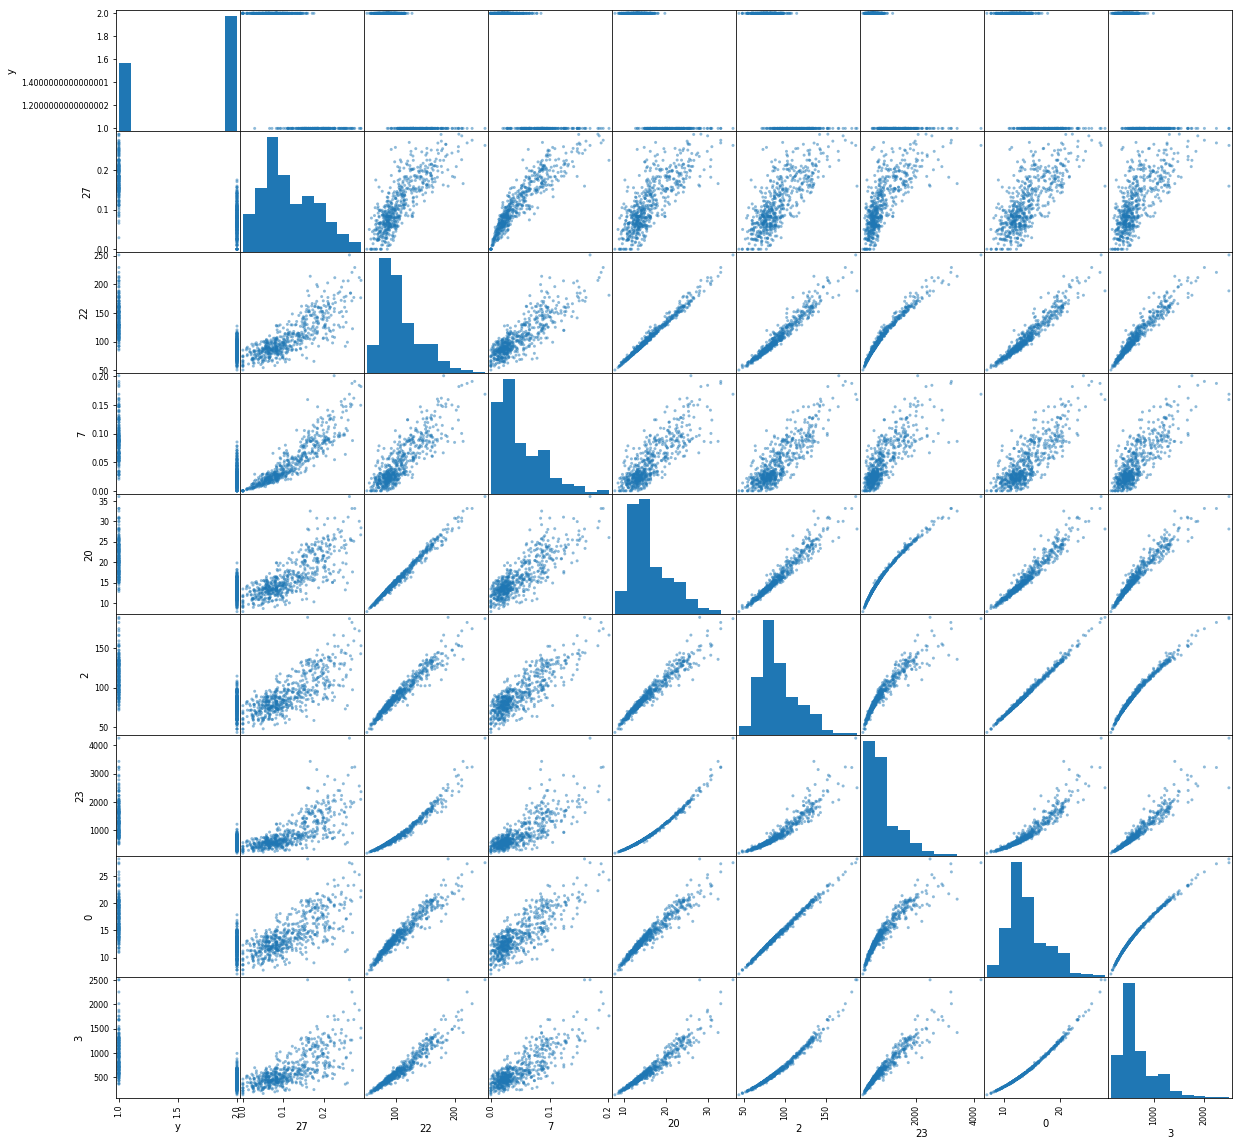

In [10]:
imp_attribs = pd.plotting.scatter_matrix(df[['y',27,22, 7,20,2,23,0,3]], figsize=(20,20))

In [10]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

2    0.627417
1    0.372583
Name: y, dtype: float64

In [12]:
# sns.set_style('whitegrid')
balance_check = sns.countplot(x='y',data=df,palette='RdBu_r')

NameError: name 'sns' is not defined

# Preprocessing

**In this dataset:** <br>
- No categorical attributes exists <br>
- I did not consider it as imbalanced since the ratio is almost 2:3
- Scaling will be applied

In [14]:
scaler = MinMaxScaler()
cancer_prepared = scaler.fit_transform(df.drop('y',axis=1))
cancer_prep_df = pd.DataFrame(cancer_prepared)

In [37]:
scaler_ones = MinMaxScaler(feature_range=(-1,1))
cancer_ones = scaler_ones.fit_transform(df.drop('y',axis=1))

# 1. Naive Bayes

In [12]:
conf_NB, val_scores_NB, test_pred_NB = classify(df.drop('y',axis=1), df['y'],
                                                df_test.drop('y',axis=1), df['y'],classifiers['Naive Bayes']())

KeyError: "labels ['y'] not contained in axis"

The model score is 0.932 (+/- 0.033)
The IQR is 0.070 between [0.89,0.96]
There is 0 deleted rows


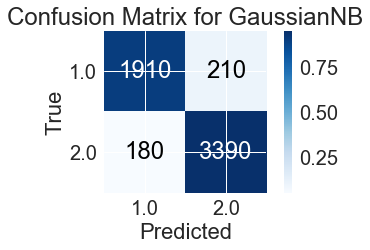

In [16]:
conf_NB_scaled, test_scores_NB_scaled = classify(cancer_prepared, df['y'],classifiers['Naive Bayes']())

# 2. Logistic Regression

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

The model score is 0.951 (+/- 0.019)
The IQR is 0.018 between [0.95,0.96]
There is 0 deleted rows


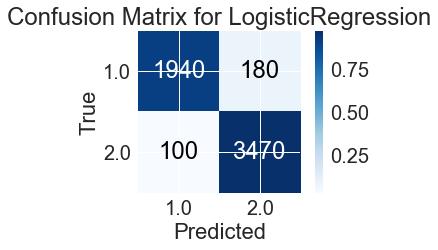

In [17]:
conf_LR, test_scores_LR = classify(df.drop('y',axis=1), df['y'],classifiers['Logistic Regression']())

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

The model score is 0.965 (+/- 0.023)
The IQR is 0.036 between [0.95,0.98]
There is 0 deleted rows


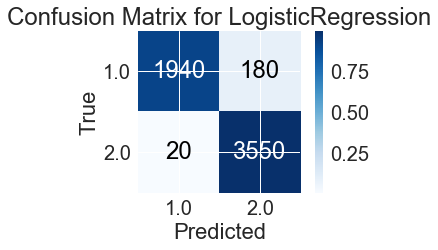

In [18]:
conf_LR_scaled, test_scores_LR_scaled = classify(cancer_prepared, df['y'],classifiers['Logistic Regression']())

# 3. Ensemble - Random Forests

The model score is 0.961 (+/- 0.032)
The IQR is 0.035 between [0.95,0.98]
There is 0 deleted rows


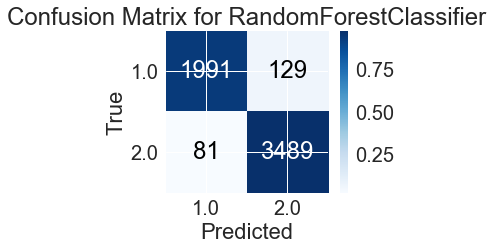

In [19]:
conf_RF, test_scores_RF = classify(df.drop('y',axis=1), df['y'],classifiers['RF'](n_estimators = 100))

The model score is 0.963 (+/- 0.030)
The IQR is 0.035 between [0.95,0.98]
There is 0 deleted rows


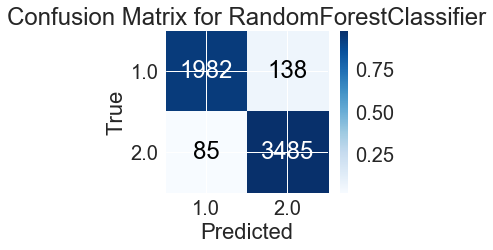

In [20]:
conf_RF_scaled, test_scores_RF_scaled = classify(cancer_prepared, df['y'],classifiers['RF'](n_estimators=100))

# 4. Ensemble - AdaBoost

The model score is 0.977 (+/- 0.012)
The IQR is 0.017 between [0.97,0.98]
There is 0 deleted rows


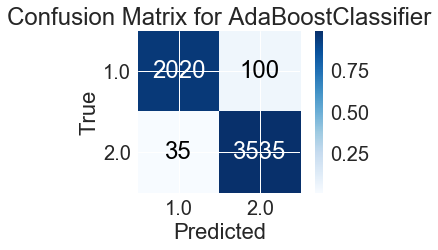

In [21]:
conf_Ada, test_scores_Ada = classify(df.drop('y',axis=1), df['y'],classifiers['AdaBoost'](n_estimators=100))

# 5. K-Nearest Neighbours

The model score is 0.930 (+/- 0.029)
The IQR is 0.054 between [0.91,0.96]
There is 0 deleted rows


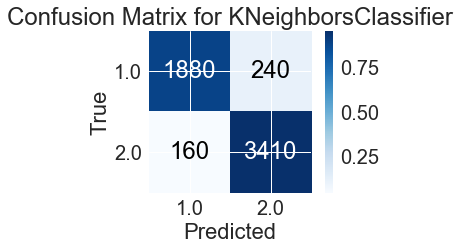

In [22]:
conf_KNN, test_scores_KNN = classify(df.drop('y',axis=1), df['y'],classifiers['KNN'](5))

The model score is 0.967 (+/- 0.023)
The IQR is 0.034 between [0.95,0.98]
There is 0 deleted rows


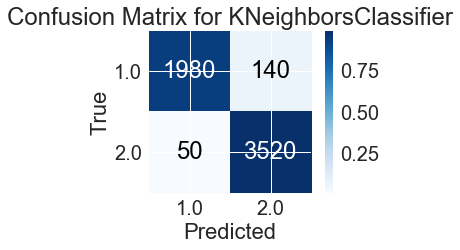

In [23]:
conf_KNN_scaled, test_scores_KNN_scaled = classify(cancer_prepared, df['y'],classifiers['KNN'](5))

The model score is 0.967 (+/- 0.023)
The IQR is 0.034 between [0.95,0.98]
There is 0 deleted rows


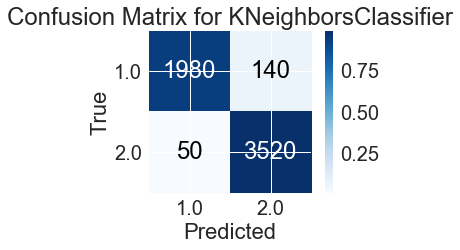

In [45]:
conf_KNN_scaled1, test_scores_KNN_scaled1 = classify(cancer_ones, df['y'],classifiers['KNN'](5))

# 6. Support Vector Machines - Linear Kernel

The model score is 0.954 (+/- 0.019)
The IQR is 0.034 between [0.93,0.96]
There is 0 deleted rows


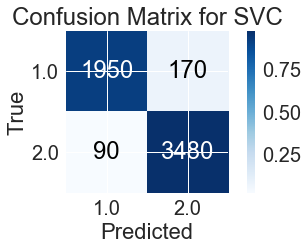

In [24]:
conf_SVM_L, test_scores_SVM_L = classify(df.drop('y',axis=1), df['y'],classifiers['SVM'](kernel='linear'))

The model score is 0.977 (+/- 0.024)
The IQR is 0.036 between [0.96,1.00]
There is 0 deleted rows


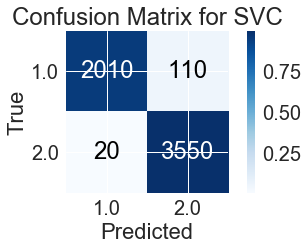

In [25]:
conf_SVM_L_scaled, test_scores_SVM_L_scaled = classify(cancer_prepared, df['y'],classifiers['SVM'](kernel='linear'))

In [26]:
param_grid = [
    {'C':2.**np.linspace(-15,15,31),'gamma':2.**np.linspace(-2,15,18)}
]

clf = SVC(kernel='linear')
grid_search_L = GridSearchCV(clf, param_grid, cv=10)
grid_search_L.fit(cancer_prepared, df['y'])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([3.05175781e-05, 6.10351...
       5.12000000e+02, 1.02400000e+03, 2.04800000e+03, 4.09600000e+03,
       8.19200000e+03, 1.63840000e+04, 3.27680000e+04]),
                          'gamma': array([2.5000e-01, 5.0000e-01, 1.0000e+00, 2.0000e+00, 4.0000e+00,
       8.0000e+00, 1.6000e+01, 3.2000e+01, 6.4000e+01, 1.2800e+02,
       2.5600e+02, 5.1200e+02, 1.0240e+03, 2.0480e+03, 4.0960e+03,
       8.1920e+03, 1.6384e+04, 3.2768e+04])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score

The model score is 0.982 (+/- 0.022)
The IQR is 0.034 between [0.97,1.00]
There is 0 deleted rows


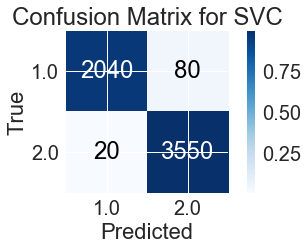

In [27]:
conf_SVM_L_opt, test_scores_SVM_L_opt = classify(cancer_prepared, df['y'],
                                                 classifiers['SVM'](kernel='linear', C=grid_search_L.best_params_['C'],
                                                                        gamma = grid_search_L.best_params_['gamma']))

In [47]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='linear')
grid_search_L1 = GridSearchCV(clf, param_grid, cv=10)
grid_search_L1.fit(cancer_prepared, df['y'])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([3.05175781e-05, 6.10351...
       1.25000000e-01, 2.50000000e-01, 5.00000000e-01, 1.00000000e+00,
       2.00000000e+00, 4.00000000e+00, 8.00000000e+00, 1.60000000e+01,
       3.20000000e+01, 6.40000000e+01, 1.28000000e+02, 2.56000000e+02,
       5.12000000e+02, 1.02400000e+03, 2.04800000e+03, 4.09600000e+03,
       8.19200000e+03, 1.63840000e+04, 3.27680000e+04])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

The model score is 0.977 (+/- 0.019)
The IQR is 0.017 between [0.97,0.98]
There is 0 deleted rows


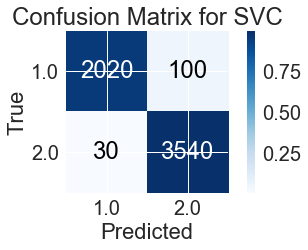

In [48]:
conf_SVM_L_opt1, test_scores_SVM_L_opt1 = classify(cancer_ones, df['y'],
                                                 classifiers['SVM'](kernel='linear', C=grid_search_L1.best_params_['C'],
                                                                        gamma = grid_search_L1.best_params_['gamma']))

In [28]:
cvres = grid_search_L.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 0.25}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 0.5}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 1.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 2.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 4.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 8.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 16.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 32.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 64.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 128.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 256.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 512.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 1024.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 2048.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 4096.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 8192.0}
0.6274165202108963 {'C': 3.0517578125e-05, 'gamma': 16384.0}
0.627

# 7. Support Vector Machines - RBF Kernel

The model score is 0.916 (+/- 0.029)
The IQR is 0.033 between [0.90,0.93]
There is 0 deleted rows


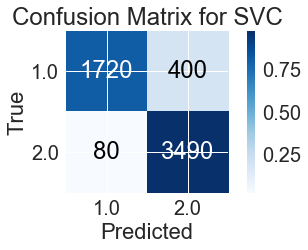

In [30]:
conf_SVM_RBF, test_scores_SVM_RBF = classify(df.drop('y',axis=1), df['y'],classifiers['SVM'](kernel='rbf', gamma='scale'))

The model score is 0.984 (+/- 0.015)
The IQR is 0.018 between [0.98,1.00]
There is 0 deleted rows


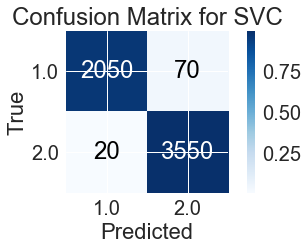

In [31]:
conf_SVM_RBF_scaled, test_scores_SVM_RBF_scaled = classify(cancer_prepared, df['y'],
                                                           classifiers['SVM'](kernel='rbf', gamma='scale', C=10))

In [32]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='rbf')
grid_search_RBF = GridSearchCV(clf, param_grid, cv=10)
grid_search_RBF.fit(cancer_prepared, df['y'])

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([2.5000e-01, 5.0000e-01, 1.0...
       2.5600e+02, 5.1200e+02, 1.0240e+03, 2.0480e+03, 4.0960e+03,
       8.1920e+03, 1.6384e+04, 3.2768e+04]),
                          'gamma': array([2.5000e-01, 5.0000e-01, 1.0000e+00, 2.0000e+00, 4.0000e+00,
       8.0000e+00, 1.6000e+01, 3.2000e+01, 6.4000e+01, 1.2800e+02,
       2.5600e+02, 5.1200e+02, 1.0240e+03, 2.0480e+03, 4.0960e+03,
       8.1920e+03, 1.6384e+04, 3.2768e+04])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       

The model score is 0.984 (+/- 0.015)
The IQR is 0.018 between [0.98,1.00]
There is 0 deleted rows


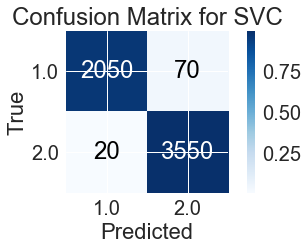

In [33]:
conf, test_scores = classify(cancer_prepared, df['y'],classifiers['SVM'](kernel='rbf', C=grid_search_RBF.best_params_['C'],
                                                                        gamma = grid_search_RBF.best_params_['gamma']))

In [49]:
param_grid = [
    {'C':2.**np.linspace(-2,15,18),'gamma':2.**np.linspace(-2,15,18)}
]

clf = SVC(kernel='rbf')
grid_search_RBF1 = GridSearchCV(clf, param_grid, cv=10)
grid_search_RBF1.fit(cancer_ones, df['y'])

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([2.5000e-01, 5.0000e-01, 1.0...
       2.5600e+02, 5.1200e+02, 1.0240e+03, 2.0480e+03, 4.0960e+03,
       8.1920e+03, 1.6384e+04, 3.2768e+04]),
                          'gamma': array([2.5000e-01, 5.0000e-01, 1.0000e+00, 2.0000e+00, 4.0000e+00,
       8.0000e+00, 1.6000e+01, 3.2000e+01, 6.4000e+01, 1.2800e+02,
       2.5600e+02, 5.1200e+02, 1.0240e+03, 2.0480e+03, 4.0960e+03,
       8.1920e+03, 1.6384e+04, 3.2768e+04])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       

The model score is 0.984 (+/- 0.015)
The IQR is 0.018 between [0.98,1.00]
There is 0 deleted rows


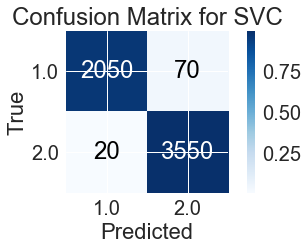

In [50]:
conf_SVM_RBF_scaled1, test_scores_SVM_RBF_scaled1 = classify(cancer_ones, df['y'],
                                                             classifiers['SVM'](kernel='rbf', 
                                                                                C=grid_search_RBF1.best_params_['C'],
                                                                        gamma = grid_search_RBF1.best_params_['gamma']))

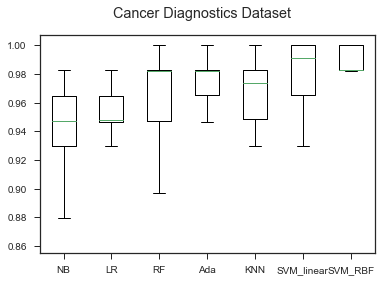

In [56]:
sns.set(font_scale=1)
sns.set_style('ticks')
fig = plt.figure()
fig.suptitle('Cancer Diagnostics Dataset')
ax = fig.add_subplot(111)
plt.boxplot([test_scores_NB, test_scores_LR, test_scores_RF,test_scores_Ada, 
             test_scores_KNN_scaled, test_scores_SVM_L_opt, test_scores_SVM_RBF_scaled])
ax.set_xticklabels(['NB','LR','RF','Ada','KNN','SVM_linear','SVM_RBF'])
plt.show()